In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

#Set directory
current_directory_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/"
os.chdir(current_directory_path)

# ML Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load Preprocessed Data

In [2]:
# Set path to the data and models
dataset_dir = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/"

# Iterate through files in the folder
for file_name in os.listdir(dataset_dir):
    # Check if the file has .pkl extension
    if file_name.endswith('unbalanced.pkl'):
        # Load the pickle file
        file_path = os.path.join(dataset_dir, file_name)
        with open(file_path, 'rb') as file:
            images, labels = pickle.load(file)
            
        # Convert to numpy arrays
        images, labels = np.array(images), np.array(labels)
        
        # Assign loaded data to variables with modified names
        # Remove .pkl extension from the file name
        variable_name = os.path.splitext(file_name)[0]
        # Remove the unbalanced part of the file name
        variable_name = variable_name[:-11]
        # Assign loaded data to variables with modified names
        globals()[f"{variable_name}_images"] = images
        globals()[f"{variable_name}_labels"] = labels

        # Optionally, you can print the loaded data for verification
        print(f"Loaded {variable_name}_images with length {images.shape}")
        print(f"Loaded {variable_name}_labels with length {len(labels)}")

Loaded en_cv_test_images with length (310, 256, 256)
Loaded en_cv_test_labels with length 310
Loaded en_cv_train_images with length (2472, 256, 256)
Loaded en_cv_train_labels with length 2472
Loaded en_cv_val_images with length (309, 256, 256)
Loaded en_cv_val_labels with length 309
Loaded en_main_test_images with length (1253, 256, 256)
Loaded en_main_test_labels with length 1253
Loaded en_main_train_images with length (10004, 256, 256)
Loaded en_main_train_labels with length 10004
Loaded en_main_val_images with length (1250, 256, 256)
Loaded en_main_val_labels with length 1250
Loaded en_pn_test_images with length (523, 256, 256)
Loaded en_pn_test_labels with length 523
Loaded en_pn_train_images with length (4172, 256, 256)
Loaded en_pn_train_labels with length 4172
Loaded en_pn_val_images with length (521, 256, 256)
Loaded en_pn_val_labels with length 521
Loaded en_tb_test_images with length (420, 256, 256)
Loaded en_tb_test_labels with length 420
Loaded en_tb_train_images with lengt

# Consistency Across Models

In [3]:
num_classes = 1
img_height = 256
img_width = 256
input_shape = (256, 256, 1)

# Main Model

In [4]:
Main_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [5]:
Main_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [6]:
Main_history = Main_model.fit(en_main_train_images, en_main_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_main_val_images, en_main_val_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.7948 - loss: 43.7927 - val_accuracy: 0.8872 - val_loss: 0.3155
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9132 - loss: 0.2267 - val_accuracy: 0.9112 - val_loss: 0.3114
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.9432 - loss: 0.1594 - val_accuracy: 0.8992 - val_loss: 0.3379
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9679 - loss: 0.0962 - val_accuracy: 0.9112 - val_loss: 0.3916
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.9650 - loss: 0.0935 - val_accuracy: 0.9304 - val_loss: 0.4100
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9822 - loss: 0.0549 - val_accuracy: 0.9336 - val_loss: 0.4224
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9384 - val_loss: 0.4370
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.9921 - loss: 0.0304 -

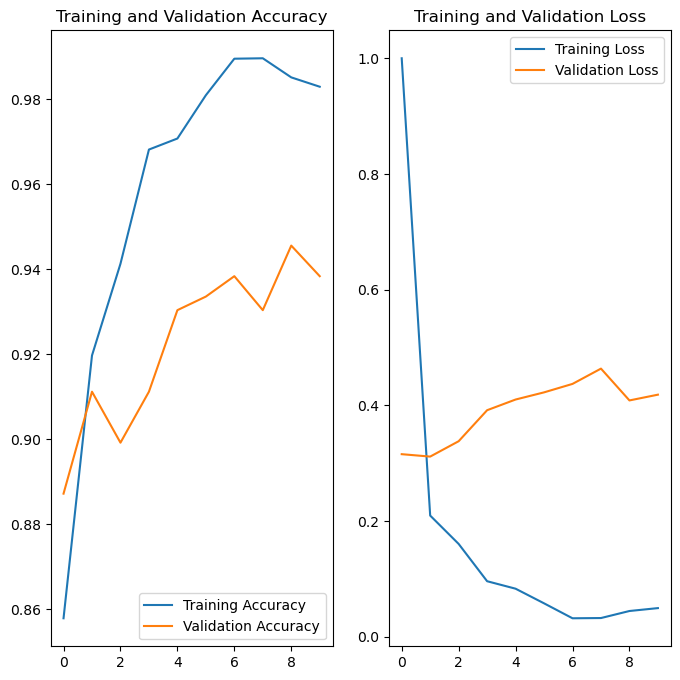

In [7]:
epochs = 10
acc = Main_history.history['accuracy']
val_acc = Main_history.history['val_accuracy']

loss = [min([x, 1]) for x in Main_history.history['loss']]
val_loss = [min([x, 1]) for x in Main_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
test_loss, test_accuracy = Main_model.evaluate(en_main_test_images, en_main_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9642 - loss: 0.1740
Test Loss: 0.4293276071548462
Test Accuracy: 0.943336009979248


In [9]:
#Main_model.summary()

### Save the model and training history

In [10]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_Main_model.keras"

# Save the trained model to the specified file path
Main_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_Main_model.keras


# Pneumonia Model

In [11]:
PN_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [12]:
PN_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [13]:
PN_history = PN_model.fit(en_pn_train_images, en_pn_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_pn_val_images, en_pn_val_labels))

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 29s 209ms/step - accuracy: 0.7789 - loss: 40.1793 - val_accuracy: 0.9539 - val_loss: 0.1342
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.9683 - loss: 0.0891 - val_accuracy: 0.9539 - val_loss: 0.1117
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 27s 202ms/step - accuracy: 0.9724 - loss: 0.0763 - val_accuracy: 0.9655 - val_loss: 0.1325
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - accuracy: 0.9862 - loss: 0.0339 - val_accuracy: 0.9712 - val_loss: 0.0879
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 27s 209ms/step - accuracy: 0.9962 - loss: 0.0141 - val_accuracy: 0.9655 - val_loss: 0.1458
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 28s 214ms/step - accuracy: 0.9988 - loss: 0.0074 - val_accuracy: 0.9655 - val_loss: 0.1419
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 28s 210ms/step - accuracy: 0.9952 - loss: 0.0113 - val_accuracy: 0.9367 - val_loss: 0.2413
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 28s 210ms/step - accuracy: 0.9318 - loss: 

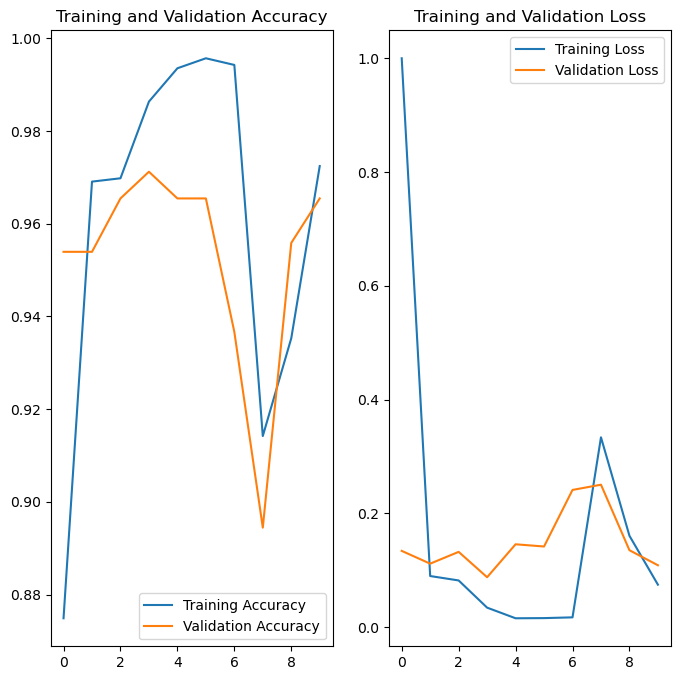

In [14]:
epochs = 10
acc = PN_history.history['accuracy']
val_acc = PN_history.history['val_accuracy']

loss = [min([x, 1]) for x in PN_history.history['loss']]
val_loss = [min([x, 1]) for x in PN_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
test_loss, test_accuracy = PN_model.evaluate(en_pn_test_images, en_pn_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9322 - loss: 0.1642
Test Loss: 0.10516488552093506
Test Accuracy: 0.9598470330238342


In [16]:
#PN_model.summary()

### Save the model and training history

In [17]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_PN_model.keras"

# Save the trained model to the specified file path
PN_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_PN_model.keras


# Covid Model

In [18]:
CV_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [19]:
CV_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [20]:
CV_history = CV_model.fit(en_cv_train_images, en_cv_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_cv_val_images, en_cv_val_labels))

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.6982 - loss: 107.1592 - val_accuracy: 0.8835 - val_loss: 0.4871
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9487 - loss: 0.1661 - val_accuracy: 0.9256 - val_loss: 0.3623
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9876 - loss: 0.0495 - val_accuracy: 0.9223 - val_loss: 0.4967
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9578 - loss: 0.1155 - val_accuracy: 0.8932 - val_loss: 0.5442
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9683 - loss: 0.1054 - val_accuracy: 0.9061 - val_loss: 0.3665
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9950 - loss: 0.0260 - val_accuracy: 0.9256 - val_loss: 0.4346
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9971 - loss: 0.0129 - val_accuracy: 0.9353 - val_loss: 0.4985
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9159 

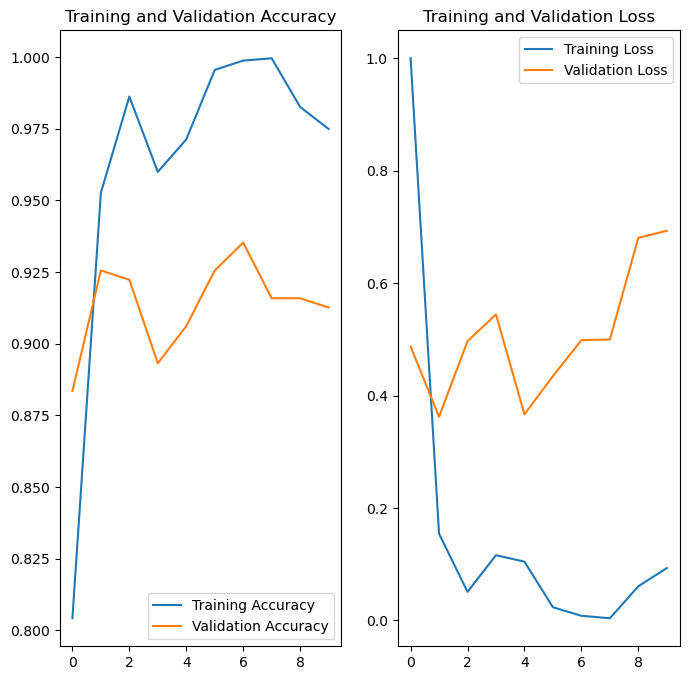

In [21]:
epochs = 10
acc = CV_history.history['accuracy']
val_acc = CV_history.history['val_accuracy']

loss = [min([x, 1]) for x in CV_history.history['loss']]
val_loss = [min([x, 1]) for x in CV_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
test_loss, test_accuracy = CV_model.evaluate(en_cv_test_images, en_cv_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9142 - loss: 0.4178
Test Loss: 0.3950261175632477
Test Accuracy: 0.9225806593894958


In [23]:
#CV_model.summary()

### Save the model and training history

In [24]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_CV_model.keras"

# Save the trained model to the specified file path
CV_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_CV_model.keras


# Tuberculosis Model

In [25]:
TB_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [26]:
TB_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [27]:
TB_history = TB_model.fit(en_tb_train_images, en_tb_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(en_tb_val_images, en_tb_val_labels))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.8094 - loss: 31.9390 - val_accuracy: 0.9333 - val_loss: 0.1658
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9565 - loss: 0.1229 - val_accuracy: 0.9524 - val_loss: 0.1428
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9844 - loss: 0.0480 - val_accuracy: 0.9595 - val_loss: 0.1535
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9714 - val_loss: 0.0809
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9667 - val_loss: 0.1022
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9690 - val_loss: 0.0909
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9986 - loss: 0.0077 - val_accuracy: 0.9405 - val_loss: 0.1920
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9814 - loss: 0

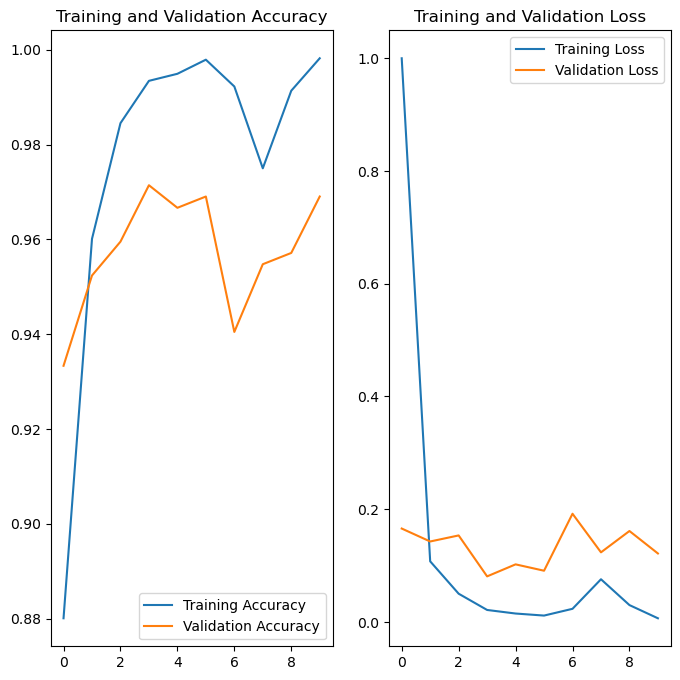

In [28]:
epochs = 10
acc = TB_history.history['accuracy']
val_acc = TB_history.history['val_accuracy']

loss = [min([x, 1]) for x in TB_history.history['loss']]
val_loss = [min([x, 1]) for x in TB_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
test_loss, test_accuracy = TB_model.evaluate(en_tb_test_images, en_tb_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9602 - loss: 0.1684
Test Loss: 0.2534656822681427
Test Accuracy: 0.9404761791229248


In [35]:
en_tb_test_images[0]

array([[ 16,  16,  16, ...,  16,  16,  11],
       [ 16,  16,  16, ...,  16,  16,  11],
       [ 16,  16,  16, ...,  16,  16,  11],
       ...,
       [191, 191, 194, ...,  15,  16,  10],
       [193, 195, 194, ...,  15,  16,  11],
       [196, 196, 197, ...,  15,  16,  11]], dtype=uint8)

In [30]:
#TB_model.summary()

### Save the model and training history

In [31]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_TB_model.keras"

# Save the trained model to the specified file path
TB_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Ensemble_Model/Unbalanced_TB_model.keras
